In [1]:
from main import main
import argparse

In [2]:
parser = argparse.ArgumentParser()
parser.add_argument('--config', help='Path to the config file', default='./default_config.yml')
parser.add_argument('--log-dir', help='Path to the log directory', default='../log/')
parser.add_argument('--posters', help='Path to the posters', default='../data/posters/')
parser.add_argument('--models-dir', help='Path to the saved models', default='../data/models/')
parser.add_argument('--preproc', help='Path to the preprocessed data', default='../data/preprocessed/')
parser.add_argument('--split', help='Path to the splitted data', default='../data/splitted/')
parser.add_argument('--database', help='Path to the databse csv', default='../data/poster_data.csv')
parser.add_argument('--csv', help='Path to the clean csv', default='../data/')
parser.add_argument('-s', '--save', help='Save model', action='store_true')
parser.add_argument('-v', '--verbose', help='Verbose', action='store_true')

str_args = '-v'.split()
args, _ = parser.parse_known_args(str_args)

In [3]:
model, test_posters, test_genres, test_ids, movies, predicted_genres, training_history = main(args)

Animation 482
Drame 2379
Thriller 385
Action 352
Romance 95
Documentaire 1114
Comédie-dramatique 491
Epouvante-horreur 144
Comédie 1059
Fantastique 93
Historique 56
Science-fiction 103
Comédie-musicale 53
Western 28
Biopic 125
Policier 115
Aventure 122
17 

Drame 577
nan 0
Romance 346
Thriller 327
Comédie 266
Comédie-dramatique 26
Action 227
Aventure 197
Historique 111
Science-fiction 75
Western 6
Fantastique 128
Comédie-musicale 98
Biopic 101
Policier 115
Epouvante-horreur 60
Documentaire 26
Animation 12
18 

nan 0
Science-fiction 40
Comédie 95
Policier 44
Drame 130
Aventure 68
Romance 91
Action 69
Thriller 82
Fantastique 53
Epouvante-horreur 22
Comédie-musicale 40
Historique 35
Comédie-dramatique 2
Western 5
Animation 4
Biopic 23
Documentaire 1
18 



 11%|█         | 768/7196 [00:00<00:00, 7674.77it/s]

Posters database downloading


  0%|          | 0/7196 [00:00<?, ?it/s]

Database downloaded
Generating dataset...


  5%|▌         | 364/7196 [01:20<22:12,  5.13it/s]  /home/alex/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 7196/7196 [33:22<00:00,  3.59it/s]  


(7196, 150, 100, 3) (7196, 17) (7196,) 17 2000 100
Action
Animation
Aventure
Biopic
Comédie
Comédie-dramatique
Documentaire
Drame
Epouvante-horreur
Historique
Thriller
1733 2000 5457
taille de IDStr (2000,)
taille de IDStest (100,)
Train on 1700 samples, validate on 300 samples
Epoch 1/5
1700/1700 [==============================] - 150s 88ms/sample - loss: 0.5583 - accuracy: 0.7670 - val_loss: 0.4102 - val_accuracy: 0.9047
Epoch 2/5
1700/1700 [==============================] - 82s 48ms/sample - loss: 0.4108 - accuracy: 0.8548 - val_loss: 0.3391 - val_accuracy: 0.9047
Epoch 3/5
1700/1700 [==============================] - 75s 44ms/sample - loss: 0.3931 - accuracy: 0.8656 - val_loss: 0.3331 - val_accuracy: 0.9047
Epoch 4/5
1700/1700 [==============================] - 86s 51ms/sample - loss: 0.3840 - accuracy: 0.8729 - val_loss: 0.3250 - val_accuracy: 0.9047
Epoch 5/5
1700/1700 [==============================] - 85s 50ms/sample - loss: 0.3751 - accuracy: 0.8765 - val_loss: 0.3242 - val_ac

In [4]:
import yaml

config = yaml.safe_load(open(args.config))
genres_inv = {config['genres'][k]: k for k in config['genres'].keys()}
print(genres_inv)

{0: 'Action', 1: 'Animation', 2: 'Aventure', 3: 'Biopic', 4: 'Comédie', 5: 'Comédie-dramatique', 6: 'Comédie-musicale', 7: 'Documentaire', 8: 'Drame', 9: 'Epouvante-horreur', 10: 'Fantastique', 11: 'Historique', 12: 'Policier', 13: 'Romance', 14: 'Science-fiction', 15: 'Thriller', 16: 'Western'}


In [5]:
import numpy as np

predictions = [] 
for pred in predicted_genres:
    first3_index = np.argsort(pred)[-3:]
    predictions.append([genres_inv[k] for k in first3_index])
        
ground_truth = []
for truth in test_genres:
    first3_index = np.nonzero(truth)[0]
    ground_truth.append([genres_inv[k] for k in first3_index])

In [6]:
r = np.random.permutation(100)[:10]
for i in r:
    print('{}: truth: {}, pred: {}'.format(movies.loc[test_ids[i], 'title'], ground_truth[i], predictions[i]))
#     print('Ground truth: {}, real: {}'.format(ground_truth[i], movies.loc[test_ids[i], 'genres']))

La Femme aux 5 éléphants: truth: ['Documentaire'], pred: ['Thriller', 'Aventure', 'Drame']
Pour quelques barres de chocolat: truth: ['Documentaire'], pred: ['Thriller', 'Aventure', 'Drame']
Amore: truth: ['Drame'], pred: ['Thriller', 'Aventure', 'Drame']
Indigène d'Eurasie: truth: ['Drame'], pred: ['Thriller', 'Aventure', 'Drame']
Near Death Experience: truth: ['Drame'], pred: ['Comédie', 'Aventure', 'Drame']
Mandorla: truth: ['Drame'], pred: ['Thriller', 'Aventure', 'Drame']
The Guilty: truth: ['Thriller'], pred: ['Thriller', 'Aventure', 'Drame']
Marie Madeleine: truth: ['Biopic', 'Drame', 'Historique'], pred: ['Thriller', 'Aventure', 'Drame']
Les Combattants: truth: ['Comédie', 'Romance'], pred: ['Comédie', 'Aventure', 'Drame']
Alien: Covenant: truth: ['Action', 'Epouvante-horreur', 'Science-fiction'], pred: ['Aventure', 'Thriller', 'Drame']


(100, 150, 100, 3)
(100, 17)
(100, 17)


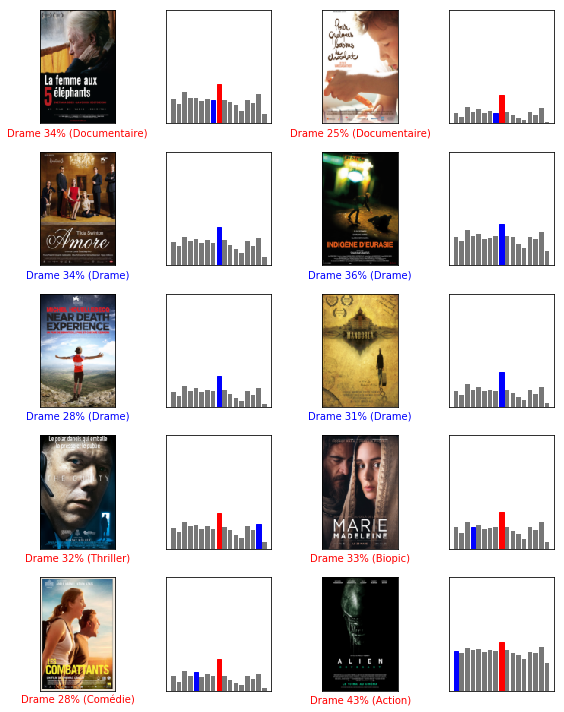

In [11]:
from utils.display.results_display import plot_test_results
print(test_posters.shape)
print(test_genres.shape)
print(predicted_genres.shape)

plot_test_results(test_posters[r], test_genres[r], genres_inv, predicted_genres[r], 0, 5, 2)

In [ ]:
from utils.display.training_display import plot_loss

if training_history is not None:
    plot_loss(training_history)